<a href="https://colab.research.google.com/github/soloflare1/PythonForML/blob/main/Final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

csv = 'https://raw.githubusercontent.com/phitronio/Python-for-ML/main/final-employee-ds.csv'

df = pd.read_csv(csv)

df


,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,Employee_96,58,Female,Marketing,9,67350.0,47,65,2021-06-20,S,9,25,2
96,197,Employee_97,56,Male,IT,12,133008.0,45,77,2011-11-03,XL,5,12,2
97,198,Employee_98,43,Female,Management,1,134297.0,45,64,2015-05-24,M,3,39,3
98,199,Employee_99,48,Male,Marketing,1,65351.0,36,84,2021-05-19,L,5,17,2


Load the TrainingHours column into a NumPy array.
Convert to float datatype


Find mean & standard deviation

Final output: Two numeric values

**Ans to the Ques. no. 1**

In [2]:

data_float =  np.array(df['TrainingHours'], dtype=float)

mean_np = np.mean(data_float)
std_np = np.std(data_float)

print(mean_np)
print(std_np)


24.19
13.842467265628624


Handle missing values (if any):
Fill missing Salary with department-wise median


Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

Final output: One numeric value

**Ans to the Ques. no. 2**

In [3]:
df['Salary'] = df.groupby('Department')['Salary'].transform( lambda x : x.fillna(x.median()))

salary_12_5 = (df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5 )

total = df[salary_12_5]['Salary'].sum()
print(total)




1985775.5


Filter employees who:
Department = "IT" or "Finance"


Age between 30–45


PerformanceScore > 88


Sort by Salary descending

Final output: Table with Name, Department, Salary, PerformanceScore

**Ans to the Ques. no. 3**

In [4]:

it_finance = df[(df['Department'] == 'IT') | (df['Department'] == 'Finance')]

age_30_45 = it_finance[((it_finance['Age'] >= 30) & (it_finance['Age'] <= 45))]

score_greater_88 = age_30_45[age_30_45['PerformanceScore'] >88 ]

sort_salary = score_greater_88.sort_values(['Salary'], ascending=False)

res = sort_salary[['Name','Department','Salary','PerformanceScore']]

print(res)




           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)
Filter top 5 employees by SalaryPerHour

Final output: Table(5 Rows) with Name, SalaryPerHour

**Ans to the Ques. no. 4**

In [5]:
df['SalaryPerHour'] = (df['Salary']) /(df['WorkHoursPerWeek'] * 4)

sort_SalaryPerHour = df.sort_values('SalaryPerHour',ascending=False)

res = sort_SalaryPerHour[['Name','SalaryPerHour']]

top_5 = res.head(5)
print(top_5)


           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


Create a bar chart showing the count of employees in each Department, separated by Gender. You can solve the question with any of the package (Matplotlib , Seaborn , Plotly )
Dataset Columns Used:
Department → Categorical variable (IT, Finance, HR, Marketing, Management)


Gender → Categorical variable (Male, Female)

Expected Output
A bar chart where:


x-axis → Department


y-axis → Number of employees


Each bar split into Male and Female segments


Colors differentiate gender


**Ans to the Ques. no. 5**

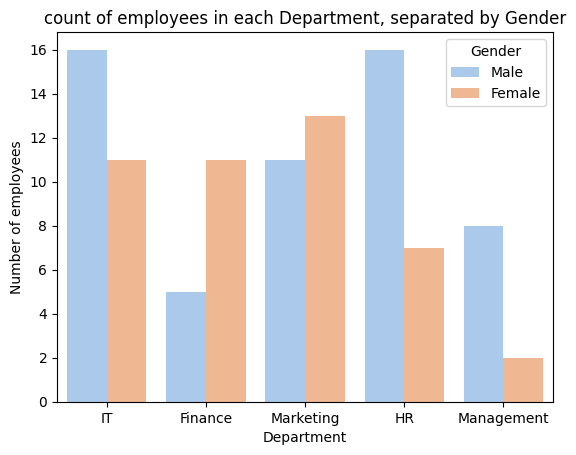

In [19]:
sns.countplot(data = df , x = 'Department', hue= 'Gender', palette='pastel')

plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('count of employees in each Department, separated by Gender')

plt.show()
